<a href="https://colab.research.google.com/github/gabrielvieiraf/ProjetosPython/blob/master/GoogleColab/MachineLearning/ProcessamentoLinguagemNatural/Linguagem_Natural_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # Processamento de Linguagem natural - Parte 01

> ## Importando dados da última aula



> ### Importando resenhas do Google Drive



In [15]:
import pandas as pd

# Permite Importar dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho para dados do arquivo csv 
csv = '/content/drive/My Drive/Colab Notebooks/Alura/imdb.csv'

# Lê arquivo CSV
resenhas = pd.read_csv(csv)

# Padronizando dados
resenhas['sentimentos'] = resenhas.sentiment.map({'neg':0,
                                                  'pos':1})
# Renomeando Coluna
resenhas.rename(columns={'text_pt':'resenha'}, inplace = True)

# Deletando colunas do DataFrame
del resenhas['sentiment'], resenhas['text_en'], resenhas['id']

# Imprime Df
resenhas.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,resenha,sentimentos
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


> ### Criando matriz esparsa das resenhas



In [101]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase = False,
                            max_features = 50)

# Criando Mochila de Palavras
bag = vetorizar.fit_transform(resenhas.resenha)

> ### Criando função para classificar sentimentos

In [19]:
def classifica(texto, coluna_texto, coluna_sentimento):

  vetorizar = CountVectorizer(lowercase = False,
                              max_features = 50)

  # Criando Mochila de Palavras
  bag = vetorizar.fit_transform(texto[coluna_texto])

  # Classificar os textos
  x = bag

  # labels, classes de treino
  y = texto[coluna_sentimento]

  # Semente para random state
  SEED = 42

  treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                          random_state=SEED,
                                                          test_size=0.25,
                                                          stratify = y)

  # Printa elementos do treino e teste
  print('Treinaremos com', treino_x.shape[0],
        'elementos e testaremos com', teste_x.shape[0], 'elementos.')
  
  # Regressão Logistica
  regressao = LogisticRegression()

  # Ensinando para máquina
  regressao.fit(treino_x,treino_y)

  # Criando previsão
  previsoes = regressao.predict(teste_x)
  previsoes.shape[0]

  # Método 02 para taxa de acerto
  taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

  # Imprime acerto
  print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

classifica(resenhas, 'resenha', 'sentimentos')

Treinaremos com 37094 elementos e testaremos com 12365 elementos.
O acerto foi de: 65.07 %


> ### Tokenizaçãp e Stop words

#### Importando dados do nltk

In [ ]:
import nltk
from nltk import *

nltk.download('all')

#### Tokenização e lista de palavras irrelevantes

In [33]:
# Aqui utilizaremos list comprehensions

palavras = ' '.join([texto for texto in resenhas.resenha])

# Crando Token separado por espaço em branco
token_espaco = tokenize.WhitespaceTokenizer()

# obs : Definição de 'palavras' está no tópico 'Nuvem de Palavras'
token_frase = token_espaco.tokenize(palavras)

# Vendo frequência de palavras
frequencia = nltk.FreqDist(token_frase)

# Lista de palavras irrelevantes
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

#### Aplicando tratamento nos dados

In [34]:
frase_processada = list()
for opiniao in resenhas['resenha']:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append( ' '.join(nova_frase))

resenhas['Tratamento_01'] = frase_processada
resenhas.head(5)

,resenha,sentimentos,Tratamento_01
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


> ### Função para visualização em nuvem

Nuvem Positiva


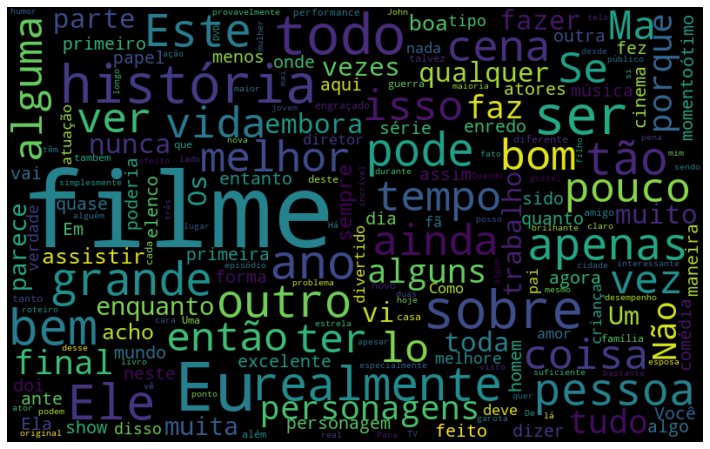





Nuvem Negativa


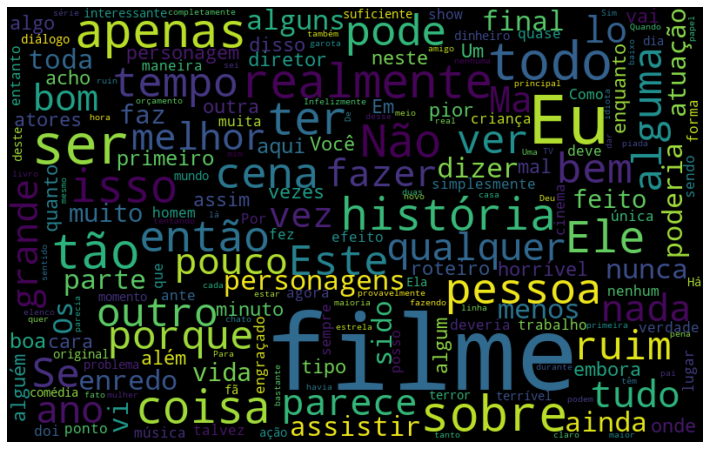

In [35]:
import matplotlib.pyplot as plt

def criaNuvem(texto, coluna_texto, sentimentos):
  texto_query = texto.query(' %s == %s ' %(coluna_texto, sentimentos))
  # Entrada da Nuvem é uma variável com todas as palavras
  # Aqui utilizaremos list comprehensions
  palavras = ' '.join([texto for texto in texto_query.Tratamento_01])

  nuvem = WordCloud( width=800, height= 500,
                    max_font_size= 120,
                    collocations = False).generate(palavras)
                    
  # Collocation = False retira bigramas
  # Tamanho da imagem
  plt.figure(figsize= (15,8))

  # Seta imagem
  plt.imshow(nuvem, interpolation= 'bilinear')

  # 'desliga' eixos da imagem
  plt.axis('off')

  # Mostra imagem
  plt.show()

# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem(resenhas, 'sentimentos', 0)

> ### Criando visualização Gráfico Paretto

In [38]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
  palavras = ' '.join([texto for texto in texto[coluna_texto]])

  token_frase = token_espaco.tokenize(palavras)

  # Vendo frequência de palavras
  frequencia = nltk.FreqDist(token_frase)

  df_palavras = pd.DataFrame({'Palavra': list(frequencia.keys()),
              'Frequência': list(frequencia.values())})
  
  # Criando Gráfico
  plt.figure(figsize=(20,10))

  df_palavras = df_palavras.nlargest( columns= 'Frequência', n = quantidade)

  ax = sns.barplot(data = df_palavras,
                  x="Palavra", y="Frequência",
                  color='red')

  ax.set(ylabel = 'Contagem')

  plt.show

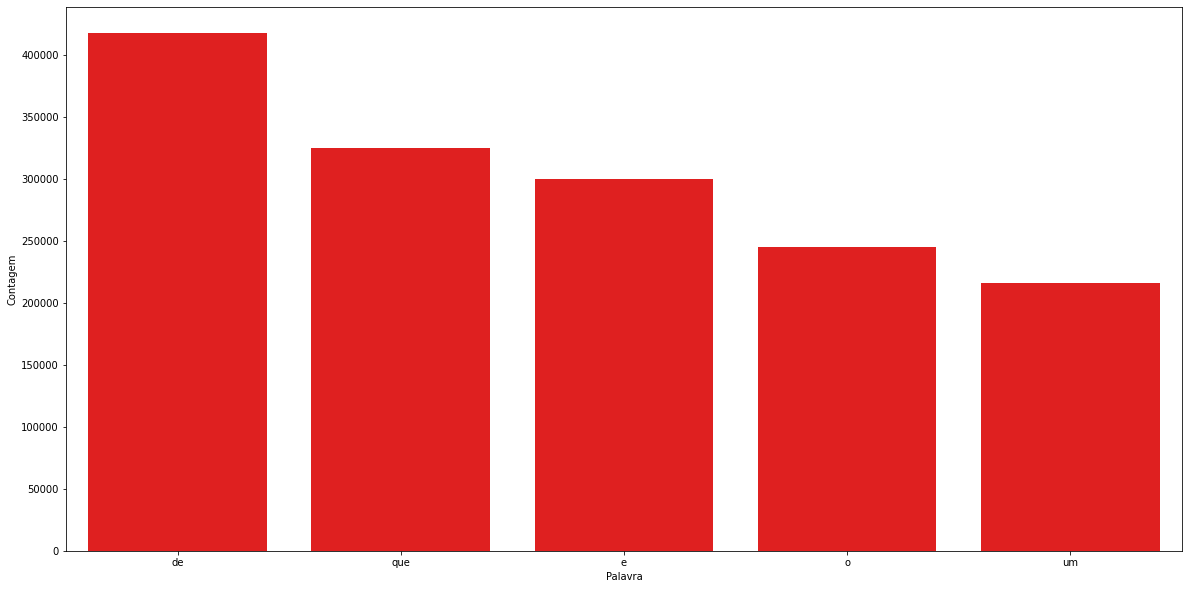

In [39]:
pareto(resenhas, 'resenha', 5)

> # Processamento de Linguagem natural - Parte 02

> ## Separando pontuação das palavras

In [13]:
from nltk import tokenize

frase = "Batata frita é bom demais!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
display(token_frase)

['Batata', 'frita', 'é', 'bom', 'demais', '!']

> ## Retirando pontuação do dataset

In [40]:
from string import punctuation

pontuacao = list()

for i in punctuation:
  pontuacao.append(i)

In [41]:
# Visualizando lista de pontos
print(pontuacao)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


### Incluindo pontos nas stopwords

In [43]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

### Removendo stopwords

In [49]:
frase_processada = list()
for opiniao in resenhas['Tratamento_01']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

  
resenhas['Tratamento_02'] = frase_processada
resenhas.head(5)

,resenha,sentimentos,Tratamento_01,Tratamento_02
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


> ## Retirando acentuação do dataset

In [51]:
!pip install unidecode

     |████████████████████████████████| 245kB 6.8MB/s 


In [55]:
import unidecode

stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [57]:
resenhas['Tratamento_03'] = sem_acentos

frase_processada = list()
for opiniao in resenhas['Tratamento_03']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenhas['Tratamento_03'] = frase_processada

resenhas.head(5)

,resenha,sentimentos,Tratamento_01,Tratamento_02,Tratamento_03
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


> ## Medindo os resultados e comparando

### Refazendo função para visualização em nuvem

In [61]:
def criaNuvem_2(texto, coluna_texto, sentimentos):
  texto_query = texto.query(' %s == %s ' %(coluna_texto, sentimentos))
  # Entrada da Nuvem é uma variável com todas as palavras
  # Aqui utilizaremos list comprehensions
  palavras = ' '.join([texto for texto in texto_query.Tratamento_03])

  nuvem = WordCloud( width=800, height= 500,
                    max_font_size= 120,
                    collocations = False).generate(palavras)
                    
  # Collocation = False retira bigramas
  # Tamanho da imagem
  plt.figure(figsize= (15,8))

  # Seta imagem
  plt.imshow(nuvem, interpolation= 'bilinear')

  # 'desliga' eixos da imagem
  plt.axis('off')

  # Mostra imagem
  plt.show()

### Classificando

Treinaremos com 37094 elementos e testaremos com 12365 elementos.
O acerto foi de: 68.02 %
Nuvem Positiva


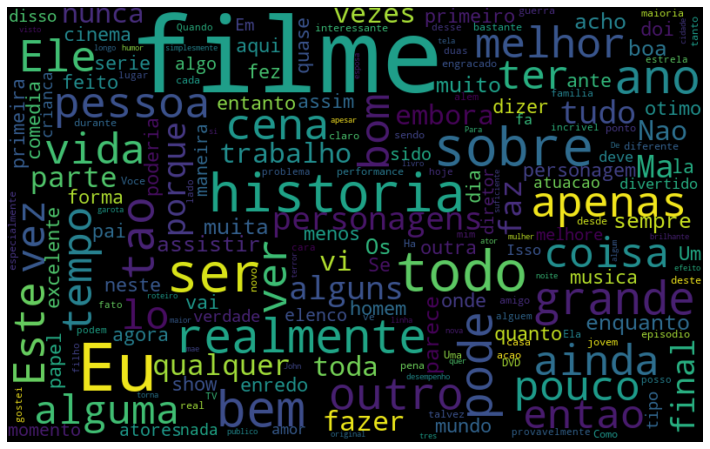





Nuvem Negativa


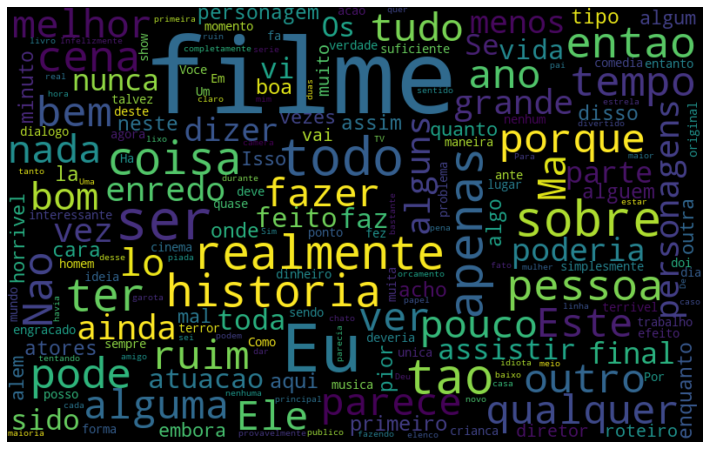

In [63]:
#classifica(texto, coluna_texto, coluna_sentimento)
classifica(resenhas, 'Tratamento_03', 'sentimentos')

# criaNuvem(texto, coluna_texto, sentimentos)

# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem_2(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem_2(resenhas, 'sentimentos', 0)

> ## Retirando letras maiúsculas do dataset

In [77]:
frase_processada = list()
for opiniao in resenhas['Tratamento_03']:
  opiniao = opiniao.lower()
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

In [82]:
resenhas['Tratamento_04'] = frase_processada

display(resenhas.head(1))
print()
display(resenhas.tail(1))

print()

#classifica(texto, coluna_texto, coluna_sentimento)
classifica(resenhas, 'Tratamento_04', 'sentimentos')

,resenha,sentimentos,Tratamento_01,Tratamento_02,Tratamento_03,Tratamento_04
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...


,resenha,sentimentos,Tratamento_01,Tratamento_02,Tratamento_03,Tratamento_04
49458,O drama romântico da classe trabalhadora do di...,1,O drama romântico classe trabalhadora diretor ...,O drama romântico classe trabalhadora diretor ...,O drama romantico classe trabalhadora diretor ...,drama romantico classe trabalhadora diretor ma...



Treinaremos com 37094 elementos e testaremos com 12365 elementos.
O acerto foi de: 68.58 %


### Visualização em nuvem

Nuvem Positiva


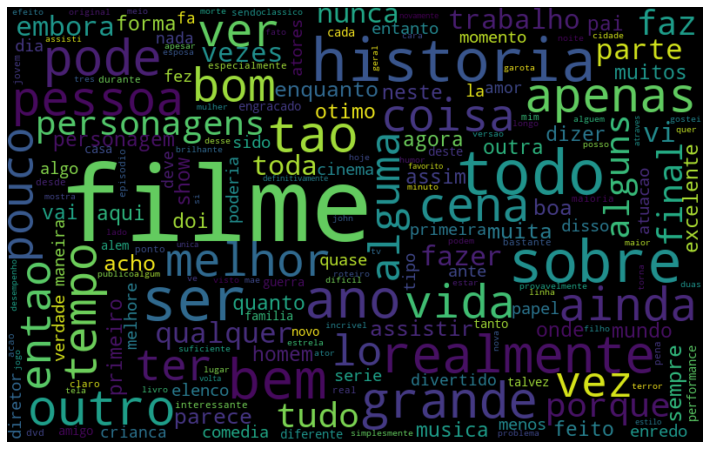





Nuvem Negativa


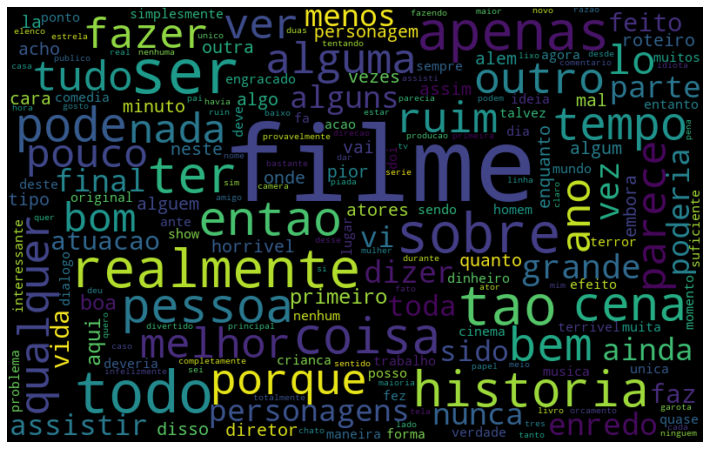

In [79]:
def criaNuvem_3(texto, coluna_texto, sentimentos):
  texto_query = texto.query(' %s == %s ' %(coluna_texto, sentimentos))
  # Entrada da Nuvem é uma variável com todas as palavras
  # Aqui utilizaremos list comprehensions
  palavras = ' '.join([texto for texto in texto_query.Tratamento_04])

  nuvem = WordCloud( width=800, height= 500,
                    max_font_size= 120,
                    collocations = False).generate(palavras)
                    
  # Collocation = False retira bigramas
  # Tamanho da imagem
  plt.figure(figsize= (15,8))

  # Seta imagem
  plt.imshow(nuvem, interpolation= 'bilinear')

  # 'desliga' eixos da imagem
  plt.axis('off')

  # Mostra imagem
  plt.show()

# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem_2(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem_2(resenhas, 'sentimentos', 0)

> ## Aplicando Stemmer

In [87]:
stemmer = nltk.RSLPStemmer()

## Pegando estrutura do tópico anterior

frase_processada = list()
for opiniao in resenhas['Tratamento_04']:
  opiniao = opiniao.lower()
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenhas['Tratamento_05'] = frase_processada

resenhas.head(1)


,resenha,sentimentos,Tratamento_01,Tratamento_02,Tratamento_03,Tratamento_04,Tratamento_05
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...


Treinaremos com 37094 elementos e testaremos com 12365 elementos.
O acerto foi de: 69.09 %
Nuvem Positiva


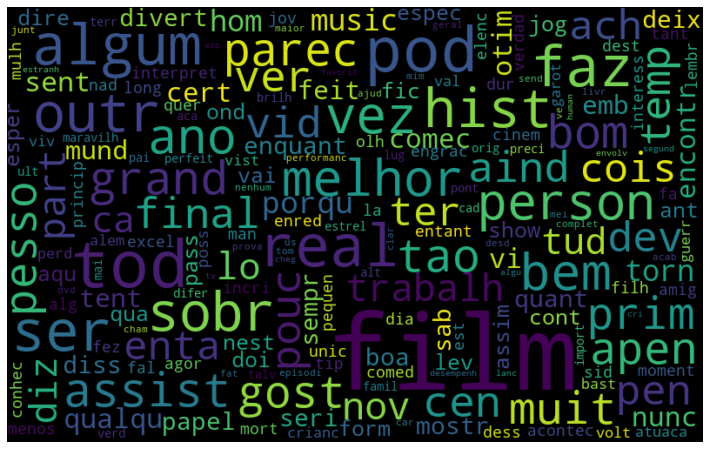





Nuvem Negativa


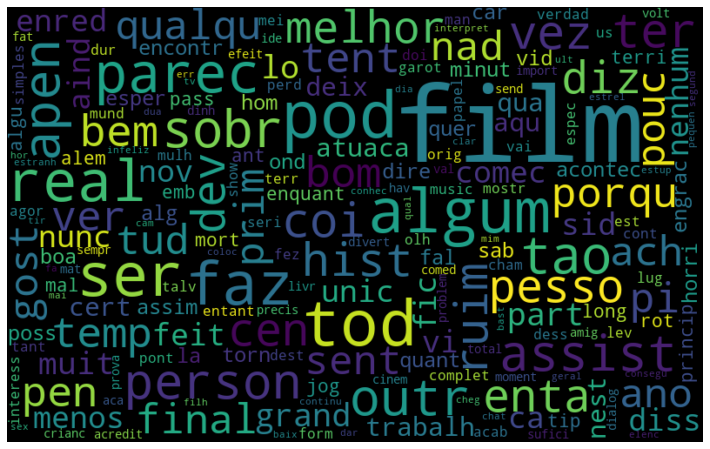

In [88]:
#classifica(texto, coluna_texto, coluna_sentimento)
classifica(resenhas, 'Tratamento_05', 'sentimentos')

def criaNuvem_4(texto, coluna_texto, sentimentos):
  texto_query = texto.query(' %s == %s ' %(coluna_texto, sentimentos))
  # Entrada da Nuvem é uma variável com todas as palavras
  # Aqui utilizaremos list comprehensions
  palavras = ' '.join([texto for texto in texto_query.Tratamento_05])

  nuvem = WordCloud( width=800, height= 500,
                    max_font_size= 120,
                    collocations = False).generate(palavras)
                    
  # Collocation = False retira bigramas
  # Tamanho da imagem
  plt.figure(figsize= (15,8))

  # Seta imagem
  plt.imshow(nuvem, interpolation= 'bilinear')

  # 'desliga' eixos da imagem
  plt.axis('off')

  # Mostra imagem
  plt.show()


# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem_4(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem_4(resenhas, 'sentimentos', 0)

> ## TF-IDF

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ignorar warnings 
import warnings
warnings.filterwarnings("ignore")

# Regressão Logistica
regressao = LogisticRegression()

tfidf = TfidfVectorizer(lowercase= False, max_features=50)

tfidf_bruto = tfidf.fit_transform(resenhas['resenha'])

tfidf_tratados = tfidf.fit_transform(resenhas['Tratamento_05'])

SEED = 42

# Classificar os textos
x = tfidf_tratados

# labels, classes de treino
y = resenhas[['sentimentos']]

treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         random_state=SEED
                                                         )

regressao.fit(treino_x,treino_y)
erro = regressao.score(teste_x,teste_y)

# Método 02 para taxa de acerto
taxa_de_acerto = erro*100

# Imprime acerto
print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

O acerto foi de: 69.88 %


> ## Ngrams

In [122]:
tfidf_2 = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

vetor_ngram = tfidf_2.fit_transform(resenhas['Tratamento_05'])

SEED = 42

# Classificar os textos
x = vetor_ngram

# labels, classes de treino
y = resenhas[['sentimentos']]

treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         random_state=SEED
                                                         )

regressao.fit(treino_x,treino_y)

erro_2 = regressao.score(teste_x,teste_y)

# Método 02 para taxa de acerto
taxa_de_acerto_2 = erro_2*100

# Imprime acerto
print("O acerto foi de: %.2f" % taxa_de_acerto_2,'%' )

O acerto foi de: 88.59 %


In [134]:
pesos = pd.DataFrame(
    regressao.coef_[0].T,
    index = tfidf_2.get_feature_names(),
)

pesos.nlargest(10, 0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [135]:
pesos.nsmallest(10,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310
